In [3]:
import re
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
# import seaborn as sns

## First Step: Select Airbnb Homes for Research
### The logic is to find the majority of all homes (80%) using normal distribution.

In [41]:
fields = ['id', 'last_scraped','number_of_reviews', 'review_scores_rating', 
          'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 
          'review_scores_communication', 'review_scores_location', 'review_scores_value', 
          'reviews_per_month']
homes_df = pd.read_csv("./Data/listings.csv", encoding = "utf-8", usecols = fields)

homes_df.columns = ['home_id', 'last_scraped', 'number_of_reviews',
                    'scores_overall', 'scores_accuracy', 'scores_cleanliness', 
                    'scores_checkin', 'scores_communication', 'scores_location', 
                    'scores_value', 'reviews_per_month']
homes_df = homes_df.dropna() # removed 660 homes which are lack of some score information
homes_df.head(3)

,home_id,last_scraped,number_of_reviews,scores_overall,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,reviews_per_month
0,241032,2016-01-04,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,953595,2016-01-04,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48
2,3308979,2016-01-04,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,1.15


In [42]:
# change price from string to integer such as "$85.00" to "85"
def extract_price(s):
    return int(''.join(re.findall(r"\d+", s.split('.')[0])))

homes_df.price = [extract_price(p) for p in homes_df.price]
homes_df.head(3)

AttributeError: 'DataFrame' object has no attribute 'price'

In [31]:
max(homes_df.last_scraped)
min(homes_df.last_scraped)

'2016-01-04'

In [4]:
print("There are " + str(len(homes_df)) + " airbnb homes.")
print("The price ranging from $" + str(min(homes_df.price)) + " to $" 
      + str(max(homes_df.price)) + ".")

There are 3158 airbnb homes.
The price ranging from $25 to $1000.


In [5]:
import numpy as np
from scipy import stats
from scipy.stats import norm

#正态分布的概率密度函数。可以理解成 x 是 mu（均值）和 sigma（标准差）的函数
def normfun(x,mu,sigma):
    pdf = np.exp(-((x - mu)**2)/(2*sigma**2)) / (sigma * np.sqrt(2*np.pi))
    return pdf

def cdf(x, mean, std):
    return stats.norm.cdf(x, loc = mean, scale = std)

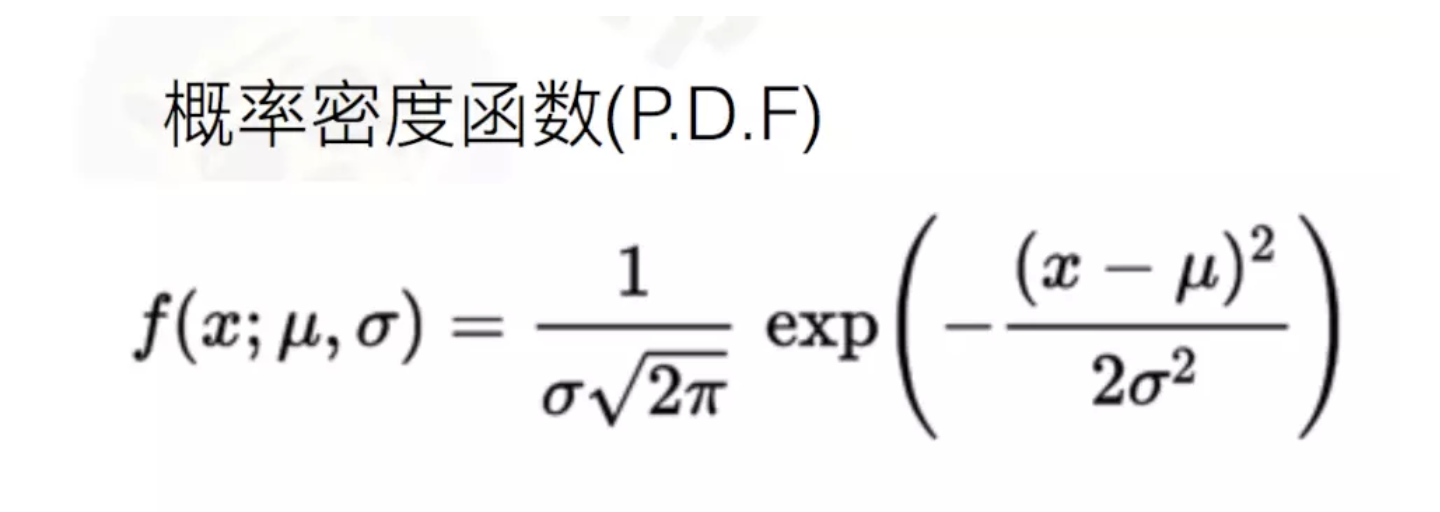

In [6]:
def price_dtrb_hist_plot(homes_df, price_range):
    
    # Select data from dataframe
    data = homes_df[homes_df.price <= price_range[1]].price
    mean, std = norm.fit(data)
    # 设定 x 轴前两个数字是 X 轴的开始和结束，第三个数字表示步长，或者区间的间隔长度
    x = np.arange(price_range[0], price_range[1], 0.1) 
    #设定 y 轴，载入刚才的正态分布函数
    y = normfun(x, mean, std)
    plt.plot(x,y)
    #画出直方图，最后的“normed”参数，是赋范的意思，数学概念
    plt.hist(data, bins=50, rwidth=0.9, density=True, alpha=0.6, color='g')
    subtitle = "Fit results: mean = %.2f,  std = %.2f" % (mean, std)
    plt.suptitle('Price distribution')
    plt.title(subtitle)
    plt.xlabel('Price')
    plt.ylabel('Probability')
    #输出
    plt.show()
    
    # 计算置信区间
    # 这里的0.8是置信水平
    conf_interval = stats.norm.interval(0.8, loc=mean, scale=std)
    print(conf_interval)
    prob = cdf(conf_interval[1], 126, 90) - cdf(conf_interval[0], 126, 90)
    print(prob)

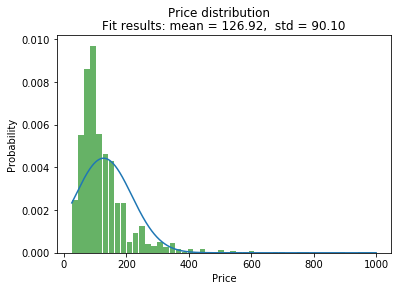

(11.454521584190857, 242.39348348230692)
0.8004822141897883


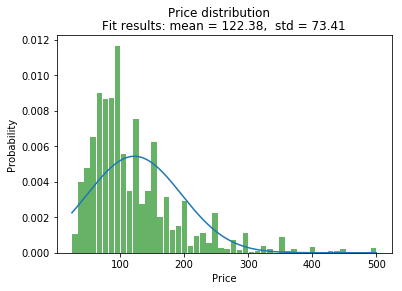

(28.306770830881604, 216.457991377864)
0.7037184652285017


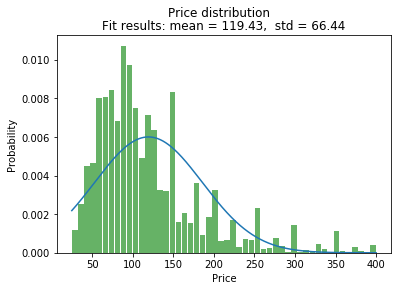

(34.280987575449814, 204.57091197380967)
0.6545935083717964


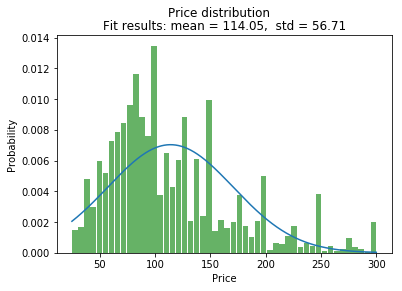

(41.36639145927616, 186.72517639316123)
0.57656146756483


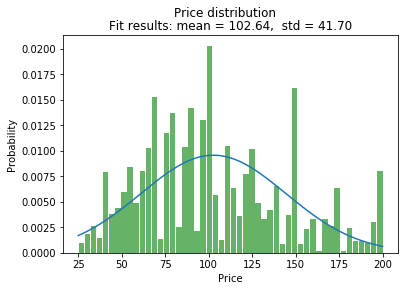

(49.18976983807186, 156.0819188445415)
0.4341963724177405

Using conf_intveral and  cumulative density function, we can find that the original distribution is a normal distrobution because the prob is equal to the confidence_interval we set as 0.8.
In this research, I want to deal with the majority of airbnb homes. So, I will use the price range of [25, 243] to select data. The selected homes will be the 80% in the price normal distribution


In [7]:
price_dtrb_hist_plot(homes_df, [25, 1000])
price_dtrb_hist_plot(homes_df, [25, 500])
price_dtrb_hist_plot(homes_df, [25, 400])
price_dtrb_hist_plot(homes_df, [25, 300])
price_dtrb_hist_plot(homes_df, [25, 200])

print()
print("Using conf_intveral and  cumulative density function, we can find that the original distribution is a normal distrobution because the prob is equal to the confidence_interval we set as 0.8.")
print("In this research, I want to deal with the majority of airbnb homes. So, I will use the price range of [25, 243] to select data. The selected homes will be the 80% in the price normal distribution")


In [8]:
# bar chart plot function

def price_dtrb_bar_plot(df, width):
    prices = df.index
    counts = df.num_price

    # Make the same graph
    f, ax = plt.subplots(figsize=(18,5))
    plt.bar(prices, counts, color="skyblue", width=width, linewidth = 1, 
            edgecolor='white', align='edge', alpha=0.7)

    # Add titles
    plt.title("Airbnb Homes Price Distribution Chart", loc="center")
    plt.xlabel("$ Price")
    plt.ylabel("Count of Homes")
    plt.xticks(prices)
    ax.legend(fontsize = 14)

    plt.show()

In [9]:
home_price_count =  homes_df['price'].value_counts()

home_price_count_df = DataFrame(home_price_count.values, 
                                index = home_price_count.index, 
                                columns = ['num_price'])
home_price_count_df.index.names = ['$price']

No handles with labels found to put in legend.


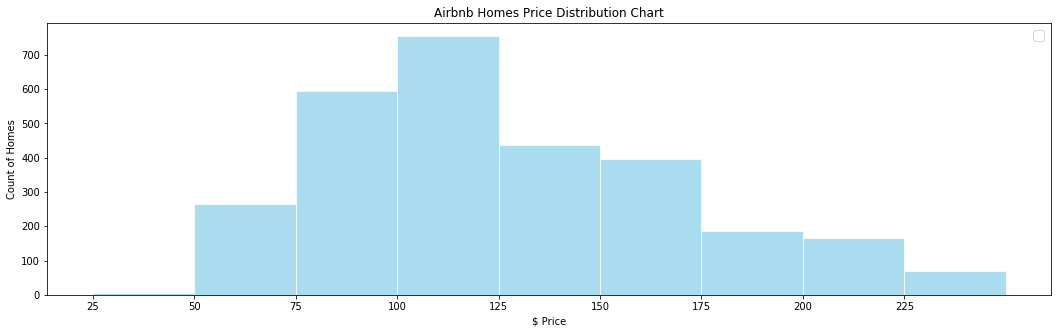

In [10]:
# Segment the prices into several price range to plot.
# First, I tried the `$25` as price range.

def plot_vars(bin_range, max_price):
    binedges = np.arange(0, max_price, bin_range)
    binlabels = np.arange(bin_range, max_price, bin_range)
    tmp = home_price_count_df.groupby(pd.cut(home_price_count_df.index,
                                          bins = binedges,
                                          labels = binlabels)
                                  ).num_price.sum()
    
    tmp_df = tmp.to_frame()
    tmp_df.index.names = ['price_range']
#     price_dtrb_area_plot(tmp_df)
    price_dtrb_bar_plot(tmp_df, bin_range)
    
    
    

plot_vars(25, 243)

In [11]:
homes_sample_df = homes_df[homes_df['price'] > 25]
homes_sample_df = homes_sample_df[homes_sample_df['price'] <= 243]

In [43]:
# len(homes_sample_df)
len(homes_df)

3158

In [44]:
homes_df.to_csv('./Data/selected_data_for_research.csv', sep='\t', encoding='utf-8')

**********************************************************************************************
## Next Step: Combine selected homes with its reviews

In [6]:
# Load Necessary Data: reviews
reviews_df = pd.read_csv("./Data/reviews.csv", encoding="utf-8")
reviews_df.columns = ['home_id', 'review_id', 'date', 'reviewer_id', 'reviewer_name', 'comments']
reviews_df.dropna()
reviews_df.head(2)
len(reviews_df)

84849

In [8]:
print(min(reviews_df.date), max(reviews_df.date))
# reviews_df.groupby('comments').count()
reviews_df = reviews_df[reviews_df.comments != 'The host canceled this reservation the day before arrival. This is an automated posting.']
len(reviews_df)

2009-06-07 2016-01-03


84792

In [33]:
from langdetect import detect
def lang_detection(series):
    isEn = []
    for text in series:
        try:
            language = detect(text)
        except:
            language = "error"
            print("This row throws and error:", text)
        
        if language == 'en':
            isEn.append(True)
        else:
            isEn.append(False)
            
    return isEn
#     return [True if detect(text) == 'en' else False for text in series]

In [35]:
lang_isen = lang_detection(reviews_df.comments)

This row throws and error: .
This row throws and error: ...
This row throws and error: :)
This row throws and error: -
This row throws and error: nan
This row throws and error: :)
This row throws and error: nan
This row throws and error: nan
This row throws and error: nan
This row throws and error: nan
This row throws and error: *
This row throws and error: nan
This row throws and error: nan
This row throws and error: nan
This row throws and error: .
This row throws and error: nan
This row throws and error: nan
This row throws and error: nan
This row throws and error: nan
This row throws and error: nan
This row throws and error: .
This row throws and error: nan
This row throws and error: nan
This row throws and error: nan
This row throws and error: ..
This row throws and error: .
This row throws and error: .
This row throws and error: nan
This row throws and error: nan
This row throws and error: .


In [39]:
reviews_df = reviews_df[lang_isen]

In [57]:
reviews_df.head()

,home_id,review_id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [45]:
sample1_df = pd.read_csv("./Data/selected_data_for_research.csv", sep='\t', encoding="utf-8")
sample1_df = sample1_df.drop("Unnamed: 0", axis=1)
sample1_df.head(2)

,home_id,last_scraped,number_of_reviews,scores_overall,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,reviews_per_month
0,241032,2016-01-04,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,4.07
1,953595,2016-01-04,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1.48


In [49]:
# Merge the reviews and homes in the sample data.
df1 = sample1_df[['home_id', 'scores_cleanliness', 'scores_location']]
df2 = reviews_df[['home_id', 'review_id', 'comments']]
sample1_rh_df = pd.merge(df1, df2, on="home_id")
sample1_rh_df.head(3)
# sample1_rh_df.stack()[0].comments

,home_id,scores_cleanliness,scores_location,review_id,comments
0,241032,10.0,9.0,682061,Excellent all the way around. \r\n\r\nMaija wa...
1,241032,10.0,9.0,691712,Maija's apartment was a wonderful place to sta...
2,241032,10.0,9.0,702999,one of the most pleasant stays i've had in my ...


In [53]:
# set(sample1_rh_df.home_id)
# set(homes_df)
set(homes_df.home_id) - set(sample1_rh_df.home_id)
# print(len(set(sample1_rh_df.home_id)), len(homes_df))

{7873208, 8097708, 9558353}

In [56]:
homes_df[homes_df.home_id == 7873208]

,home_id,last_scraped,number_of_reviews,scores_overall,scores_accuracy,scores_cleanliness,scores_checkin,scores_communication,scores_location,scores_value,reviews_per_month
3527,7873208,2016-01-04,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.23


**********************************************************************************************
## Last Step: Get homes and reviews data for sentence analysis
### Find data for `cleanliness` and `location` aspects 
**********************************************************************************************
#### Brief Summary & Necessary Functions

In [47]:
# sample2_rh_df is a copy of sample1_rh_df to 
# in case unexpected modification for original data.
sample2_rh_df = sample1_rh_df
print('*' * 40 + '\nThere are:\n' + '-' * 40)
print(str(len(sample2_rh_df.groupby('home_id'))) + " Airbnb homes in total.\n" + '-' * 40)
print(str(len(sample2_rh_df)) + " reviews in total.\n" + '-' * 40)

****************************************
There are:
----------------------------------------
3155 Airbnb homes in total.
----------------------------------------
83695 reviews in total.
----------------------------------------


In [59]:
# group by aspect scores
def overview_df(aspect):
    df1 = pd.DataFrame(sample2_rh_df.groupby([aspect])['home_id'].nunique())
    df2 = pd.DataFrame(sample2_rh_df.groupby([aspect])['review_id'].nunique())
    overview_df = pd.merge(df1, df2, on = aspect)
    overview_df.columns = ['number of homes', 'number of reveiws']
    return overview_df
# what makes people comments

# Input: the expecting aspect and score
# Output: the DataFrame with selected homes and their reviews information
def home_sample_review(score, aspect, overview_df):
    num_home = overview_df.loc[score].values[0]
    num_review = overview_df.loc[score].values[1]
    tmp = num_review/2000
    avy_num_review = num_review/num_home
    size = num_home/tmp
    # Generate a uniform random sample using random
    data = list(set(sample2_rh_df[sample2_rh_df[aspect] == score].home_id))
    sample_home = np.random.choice(data, int(size), replace=False)
    
    while not sample_validation(sample_home):
        sample_home = np.random.choice(data, int(size), replace=False)
        if sample_validation(sample_home):
            break
        else:
            continue

    sample_home_review = sample2_rh_df[sample2_rh_df['home_id'].isin(sample_home)]
    print("Selected " + str(int(size)) + " homes among " + str(num_home) + " homes with score " + str(score) + ".\nSample home_ids:")
    print(sample_home)
    print("With in total: " + str(len(sample_home_review)) + ' reviews.')
    
    return sample_home_review

# This is a function is to guarantee:
# the number of reviews of the selected homes keeps around 1500.
def sample_validation(sample_home):
    sample_home_review = sample2_rh_df[sample2_rh_df['home_id'].isin(sample_home)]
    return True if np.abs(len(sample_home_review) - 1500) <= 100 else False

**********************************************************************************************
#### Get data for `cleanliness` aspect

Group homes with <= 7.0 cleanliness score together.
Based on literature review, the airbnb review score has positive bias. So, for score equal to or less than 7, we can assume there is a negetive implication of the homes.
As for homes with >= 9.0 score, randomly select sample as long as gurrantee 1500 number of reviews. 

In [60]:
clean_overview_df = overview_df('scores_cleanliness')
clean_overview_df
# clean_overview_df['number of reveiws']/clean_overview_df['number of homes']

,number of homes,number of reveiws
scores_cleanliness,,
3.0,1,2
4.0,4,9
5.0,5,23
6.0,30,107
7.0,40,511
8.0,183,3568
9.0,740,22205
10.0,2152,57270


In [19]:
# number of review selection around 1500.
clean_score7_df = sample2_rh_df[sample2_rh_df['scores_cleanliness'] <= 7.0]
print('Selected all homes with score no more than 7.0. \nSample home_ids:')
print(list(set(clean_score7_df.home_id)))
print("With in total: " + str(len(clean_score7_df)) + ' reviews.')
print('*' * 90)
clean_score8_df = home_sample_review(8.0, 'scores_cleanliness', clean_overview_df)
print('*' * 90)
clean_score9_df = home_sample_review(9.0, 'scores_cleanliness', clean_overview_df)
print('*' * 90)
clean_score10_df = home_sample_review(10.0, 'scores_cleanliness', clean_overview_df)
print('*' * 90)

clean_score7_df.to_csv('./Data/clean_score7_df.csv', sep='\t', encoding='utf-8')
clean_score8_df.to_csv('./Data/clean_score8_df.csv', sep='\t', encoding='utf-8')
clean_score9_df.to_csv('./Data/clean_score9_df.csv', sep='\t', encoding='utf-8')
clean_score10_df.to_csv('./Data/clean_score10_df.csv', sep='\t', encoding='utf-8')

Selected all homes with score no more than 7.0. 
Sample home_ids:
[7965184, 3291777, 6363779, 8754180, 3770248, 1764233, 8594059, 4041868, 3766285, 9151374, 5479566, 666897, 7245586, 7934356, 1520533, 7093910, 639130, 3889050, 3888924, 3534364, 716829, 6250399, 613151, 9509279, 5252515, 8934054, 4951079, 5353512, 3226793, 8083242, 8555304, 299817, 6865200, 7985714, 7203765, 5261239, 6992696, 670009, 8922554, 4340410, 8050232, 2769088, 1520581, 670021, 3697351, 5639238, 4082250, 1520593, 7844444, 5126365, 9183838, 9519968, 8863714, 5078244, 6958436, 9075558, 6623079, 6959336, 7732071, 2856806, 5637990, 8067053, 4773614, 3593582, 6120046, 3424242, 6717555, 7975026, 2357110, 3052151, 30712, 3732094, 3096191]
With in total: 611 reviews.
******************************************************************************************
Selected 72 homes among 169 homes with score 8.0.
Sample home_ids:
[1549973 9532861 8391954 9331449 5062445 3916050 8483477 6705584 3925572
 1039766 9448215 9300972 5

**********************************************************************************************
#### Get data for `location` aspect

Group homes with <= 7.0 cleanliness score together.

In [61]:
loc_overview_df = overview_df('scores_location')
loc_overview_df

,number of homes,number of reveiws
scores_location,,
4.0,1,1
6.0,8,13
7.0,19,150
8.0,128,1833
9.0,884,29154
10.0,2115,52544


In [21]:
# number of review selection around 1500.
loc_score7_df = sample2_rh_df[sample2_rh_df['scores_location'] <= 7.0]
print('Selected all homes with score no more than 7.0. \nSample home_ids:')
print(list(set(loc_score7_df.home_id)))
print("With in total: " + str(len(loc_score7_df)) + ' reviews.')
print('*' * 90)
loc_score8_df = home_sample_review(8.0, 'scores_location', loc_overview_df)
print('*' * 90)
loc_score9_df = home_sample_review(9.0, 'scores_location', loc_overview_df)
print('*' * 90)
loc_score10_df = home_sample_review(10.0, 'scores_location', loc_overview_df)
print('*' * 90)

loc_score7_df.to_csv('./Data/loc_score7_df.csv', sep='\t', encoding='utf-8')
loc_score8_df.to_csv('./Data/loc_score8_df.csv', sep='\t', encoding='utf-8')
loc_score9_df.to_csv('./Data/loc_score9_df.csv', sep='\t', encoding='utf-8')
loc_score10_df.to_csv('./Data/loc_score10_df.csv', sep='\t', encoding='utf-8')

Selected all homes with score no more than 7.0. 
Sample home_ids:
[7965184, 8061699, 190984, 4041868, 1549973, 6215199, 613151, 6250399, 4951079, 5353512, 8083242, 5792683, 7071021, 6019762, 1022135, 23356, 4126284, 5104077, 7415378, 6701018, 9183838, 3706719, 5637990, 6959336, 7839723, 1263470, 9157232]
With in total: 169 reviews.
******************************************************************************************
Selected 103 homes among 121 homes with score 8.0.
Sample home_ids:
[1815472 9473312 8342968 7922663 5407311 7934356 2056276 4340410 9519968
 1179538 6907671 4589654  385438 8988178 5126077 8799588 7902068 6325283
 7095802  286712 1340668 1571230 9199982 1484651 8921924 3630581  611500
 7013085 5340242 3316219 2134911  693956 6249164 4708075 7500000 9134196
 9532861 1566487 9300972 8168876 8952253 3449059 2586350 9507115 3726391
 9238818  264829 1499596 2610187  609610  571640 3544964  877203 7219541
 4130112  716829 6714817 4395654 3849918 9151374 6425652 3303857 7205